In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

In [29]:
a,b,c,d,x0,y0,T=1,2,1,3,1,0.5,8
f = lambda X : np.array([a*X[0]-b*X[0]*X[1],-c*X[1]+d*X[0]*X[1]]) 

In [30]:
def Euler_Ex(n):
    dt=T/n
    X=[[x0,y0]]
    for i in range (n):
        X.append(X[i]+dt*f(X[i]))
    return X

def Euler_Im(n):
    dt=T/n
    X=[[x0,y0]]
    for i in range (n):
        s=newton(lambda u : u-X[i]-dt*f(u),X[i])
        X.append(s)
    return X

def Crank_Ni(n):
    dt=T/n
    X=[[x0,y0]]
    for i in range (n):
        s=newton(lambda u : u-X[i]-dt*(f(u)+f(X[i]))/2,X[i])
        X.append(s)
    return X

'''
def Euler_Ex(n):
    dt=T/n
    X=[x0]
    Y=[y0]
    for i in range (n+1):
        X.append(X[i]+dt*(a*X[i]-b*X[i]*Y[i]))
        Y.append(Y[i]+dt*(-c*Y[i]+d*X[i]*Y[i]))
    return X,Y
plt.plot(Euler_Ex(5000)[0],Euler_Ex(5000)[1])'''

'\ndef Euler_Ex(n):\n    dt=T/n\n    X=[x0]\n    Y=[y0]\n    for i in range (n+1):\n        X.append(X[i]+dt*(a*X[i]-b*X[i]*Y[i]))\n        Y.append(Y[i]+dt*(-c*Y[i]+d*X[i]*Y[i]))\n    return X,Y\nplt.plot(Euler_Ex(5000)[0],Euler_Ex(5000)[1])'

Text(0.5, 1.0, 'Crank-Nicolson')

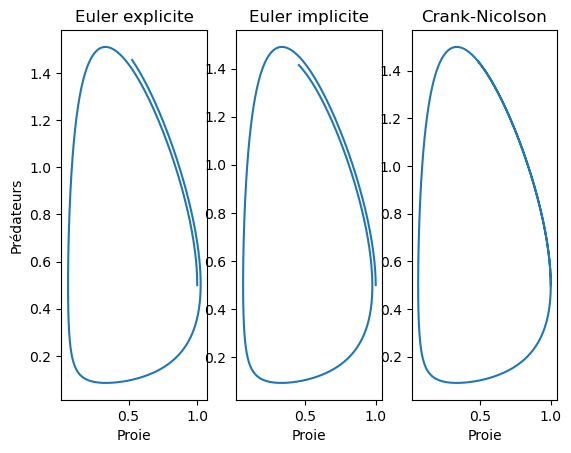

In [31]:
m=1000
#Tracer Euler explicite
plt.subplot(131)
Se=Euler_Ex(m)
Proies=[Se[i][0] for i in range (len(Se))]
Predateurs=[Se[i][1] for i in range (len(Se))]
plt.plot(Proies,Predateurs)
plt.xlabel('Proie')
plt.ylabel('Prédateurs')
plt.title('Euler explicite')
#Tracer Euler implicite
plt.subplot(132)
Si=Euler_Im(m)
Proies=[Si[i][0] for i in range (len(Si))]
Predateurs=[Si[i][1] for i in range (len(Si))]
plt.plot(Proies,Predateurs)
plt.xlabel('Proie')
plt.title('Euler implicite')
#Tracer Crank-Nicolson
plt.subplot(133)
Si=Crank_Ni(m)
Proies=[Si[i][0] for i in range (len(Si))]
Predateurs=[Si[i][1] for i in range (len(Si))]
plt.plot(Proies,Predateurs)
plt.xlabel('Proie')
plt.title('Crank-Nicolson')

Text(0.5, 1.0, 'Proie et prédateurs au cours du temps')

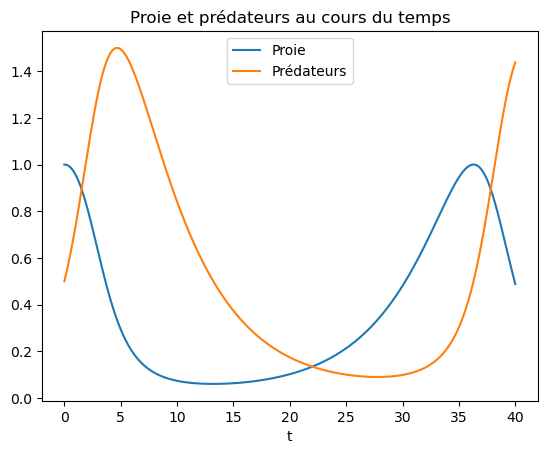

In [32]:
T=40
m=1000
dt=T/m
plt.plot(dt*np.arange(m+1),Proies,label='Proie')
plt.plot(dt*np.arange(m+1),Predateurs,label='Prédateurs')
plt.xlabel('t')
plt.legend()
plt.title('Proie et prédateurs au cours du temps')

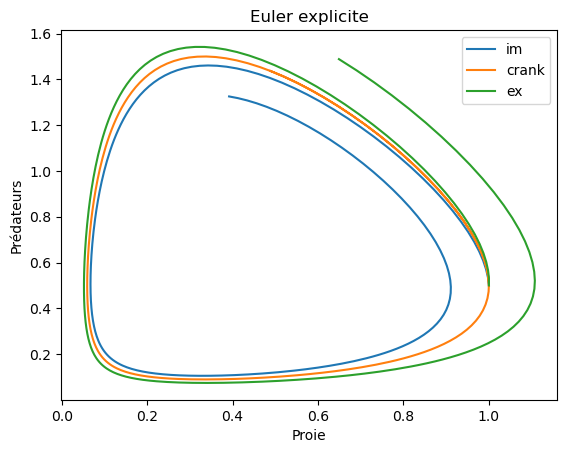

In [33]:
def explicite(n):
    dt=T/n
    X=[[x0,y0]]
    for i in range (0,n+1):
        X.append(X[i]+dt*f(X[i]))
    return X

def implicite(k,n):
    dt=T/n
    X=[[x0,y0]]
    for i in range (0,n):
        Y=X[i].copy()
        #Méthode de pt fixe
        for a in range (k):
            Y=X[i]+dt*f(Y)
        X.append(Y)
    return X

def crank(k,n):
    dt=T/n
    X=[[x0,y0]]
    for i in range (0,n):
        Y=X[i].copy()
        for a in range (k):
            Y=X[i]+dt*(f(Y)+f(X[i]))/2
        X.append(Y)
    return X

T=8
Si=implicite(10,250)
proies=[Si[i][0] for i in range (len(Si))]
predateurs=[Si[i][1] for i in range (len(Si))]
plt.plot(proies,predateurs, label='im')
Sc=crank(10,250)
proiesc=[Sc[i][0] for i in range (len(Sc))]
predateursc=[Sc[i][1] for i in range (len(Sc))]
plt.plot(proiesc,predateursc, label='crank')
S=explicite(250)
Proies=[S[i][0] for i in range (len(S))]
Predateurs=[S[i][1] for i in range (len(S))]
plt.plot(Proies,Predateurs, label='ex')
plt.xlabel('Proie')
plt.ylabel('Prédateurs')
plt.title('Euler explicite')
plt.legend()
